In [24]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
from scipy import stats

In [31]:
N = 10
size = (100,3000) # N_i times 3N_j
unc = stats.invgamma.rvs(2, scale=0.1, size=np.prod(size))

preds = np.array([stats.norm.rvs(size=N, loc=0, scale=unc[i]) for i in range(len(unc))])
ae = np.abs(np.mean(preds,axis=1))
obs_unc = np.std(preds,axis=1,ddof=1)

0.252313252202016
0.2760108407009615 0.2574924881376381


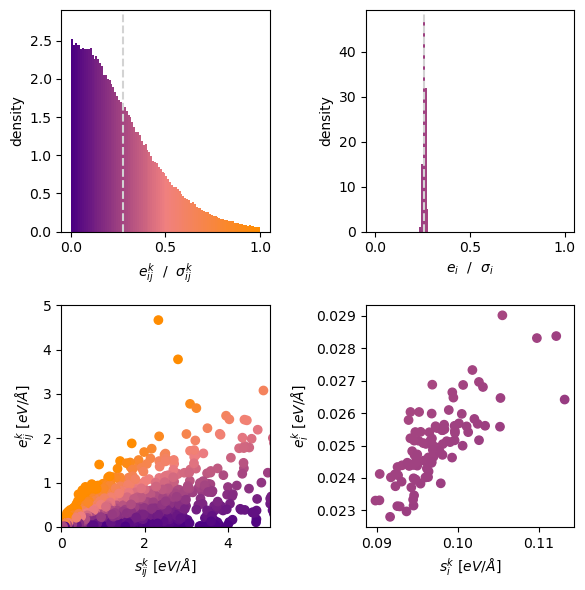

In [33]:
colors = ["indigo","lightcoral","darkorange"]  
cm = LinearSegmentedColormap.from_list("custom_cmap", colors, N=256)

fig, ax = plt.subplots(2,2, figsize=(6,6), layout='tight')

n, bins, patches = ax[0][0].hist(ae/obs_unc,range=[0,1], bins=100,  label='atomic', density=True)
bin_centers = 0.5 * (bins[:-1] + bins[1:])
col = bin_centers - min(bin_centers)
col /= max(col)
for c, p in zip(col, patches):
    plt.setp(p, 'facecolor', cm(c))
    
ax[0][0].set_ylabel(r"density")
ax[0][0].set_xlabel(r"$e_{ij}^k~~/~~\sigma_{ij}^k$")
ax[0][0].axvline(x = np.mean(ae/obs_unc),c='lightgray',linestyle='dashed')
ax[0][0].set_ylim([0,2.9])

ax[1][0].scatter(obs_unc, ae, c = [cm(x) for x in ae/obs_unc])
ax[1][0].set_xlabel(r"$s_{ij}^k~[eV/\AA]$")
ax[1][0].set_ylabel(r"$e_{ij}^k~[eV/\AA]$")
ax[1][0].set_xlim([0,5])
ax[1][0].set_ylim([0,5])

n, bins, patches = ax[0][1].hist(np.mean(ae.reshape(size), axis=1)/np.mean(obs_unc.reshape(size), axis=1),  density=True, range=[0,1], bins=100, label='aggregated')
for c, p in zip(col, patches):
    plt.setp(p, 'facecolor', cm(c))
    
ax[0][1].set_xlabel(r"$e_{i}~~/~~\sigma_{i}$")
ax[0][1].axvline(x = np.mean(np.mean(ae.reshape(size), axis=1)/np.mean(obs_unc.reshape(size))),linestyle='dashed',c='lightgray')

ax[0][1].set_ylabel(r"density")

ax[1][1].scatter(np.mean(obs_unc.reshape(size), axis=1), np.mean(ae.reshape(size), axis=1), c = [cm(x) for x in np.mean(ae.reshape(size), axis=1)/np.mean(obs_unc.reshape(size), axis=1)])
ax[1][1].set_xlabel(r"$s_{i}^k~[eV/\AA]$")
ax[1][1].set_ylabel(r"$e_{i}^k~[eV/\AA]$")


print(2/np.sqrt(2*np.pi*(N)))
print(np.mean(ae/obs_unc), np.mean(np.mean(ae.reshape(size), axis=1)/np.mean(obs_unc.reshape(size))))

